# Evaluation Metrics - Regression
1. Loading the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('D:\MACHINE LEARNING\student_scores.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\hp\AppData\Local\Temp\ipykernel_5776\1655023579.py:1: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv('D:\MACHINE LEARNING\student_scores.csv')


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
target=df["Scores"]
data=df[["Hours"]]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.7, random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(17, 1) (17,)
(8, 1) (8,)


# 3. Training the Model

In [5]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [6]:
print('y intercept:',regressor.intercept_)
print("slope:",regressor.coef_)

y intercept: 2.370815382341881
slope: [9.78856669]


# 4. Residual Analysis on Training Data

1. Distribution of the Residuals - Distribution should be normal (Gaussian) with Zero Mean.
2. IID - Check for patterns in Residuals - There should exist no pattern
3. Homoscedasticity - The variance of residual is the same for any value of X

In [8]:
y_train_pred=regressor.predict(X_train)

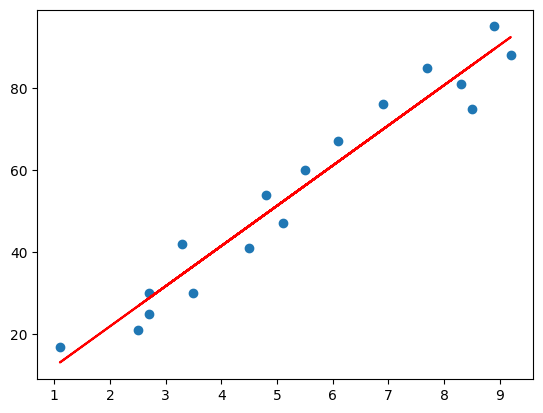

In [9]:
plt.scatter(X_train['Hours'],y_train)
plt.plot(X_train['Hours'],y_train_pred,'r')
plt.show()

In [10]:
residual=y_train-y_train_pred

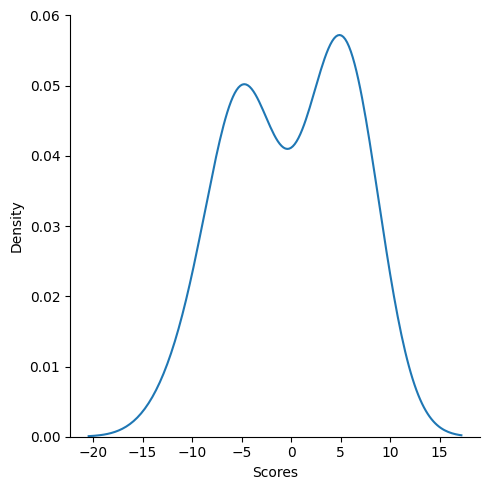

In [11]:
sns.displot(residual,kind='kde')

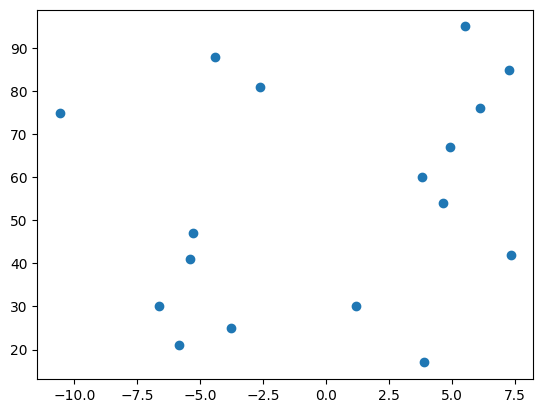

In [12]:
plt.scatter(residual,y_train)
plt.show()

<Axes: xlabel='Scores', ylabel='Count'>

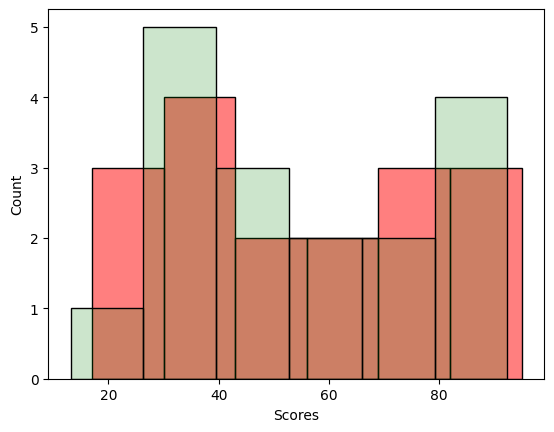

In [14]:
sns.histplot(y_train,color='Red',alpha=0.5)
sns.histplot(y_train_pred,color='green',alpha=0.2)


# 5. Making the Prediction

In [15]:
y_test_pred=regressor.predict(X_test)

In [17]:
tem_df=pd.DataFrame({"Actual":y_test,"Predict":y_test_pred})
tem_df

,Actual,Predict
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


<Axes: xlabel='Scores', ylabel='Count'>

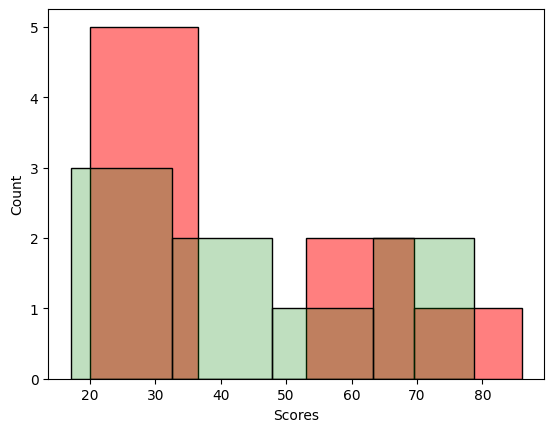

In [18]:
sns.histplot(y_test,color='red',alpha=0.5)
sns.histplot(y_test_pred,color='green',alpha=0.25)

# 6. Evaluating the Model

In [21]:
from sklearn import metrics
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean square Error:",metrics.mean_squared_error(y_test,y_test_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

mean_absolute_error: 4.419727808027652
Mean square Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315


In [22]:
metrics.median_absolute_error(y_test,y_test_pred)

3.8625683463868796

In [23]:
# R^2
metrics.r2_score(y_test,y_test_pred)

0.9568211104435257

In [24]:
r2= metrics.r2_score(y_test,y_test_pred)
n=len(y_test)
k=X_test.shape[1]
r2_adj= 1-(1-r2)*(n-1)/(n-k-1)

print(r2_adj)


0.9496246288507799
